# Content Based Recommender System With Similarity Function

**Traffic Problem**: Ingin membuat Model untuk melihat rekomendasi film dari film yang disukai melalui dataset IMDb dengan mengidentifikasi berdasarkan Judul yang disukai.

Dengan dataset diambil dari IMDb Datasets yang berisikan data data film, saya membuat recommender system yang menggunakan Content/feature dari film/entitas tersebut, kemudian melakukan perhitungan terhadap kesamaannya satu dan yang lain sehingga ketika menunjuk ke satu film, akan mendapat beberapa film lain yang memiliki kesamaan dengan film tersebut. Hal ini biasa disebut sebagai Content Based Recommender System. Dengan membandingkan kesamaan plot yang ada dan genre yang ada, ketika audience lebih menyukai film Narnia, maka content based recommender system ini akan juga merekomendasikan film seperti Harry Potter atau The Lords of The Rings yang memiliki genre yang mirip.


## A. Unloading and Checking Datasets

Dataset yang kami gunakan yaitu IMDb Datasets yang dapat didownload pada link https://datasets.imdbws.com/ . Dataset tersedia untuk akses ke pelanggan untuk penggunaan pribadi dan non-komersial. Dataset yang kami gunakan adalah sebagai berikut:

**title.basics.tsv** - Berisi informasi berikut :
* tconst (string) - pengenal unik alfanumerik dari judul
* titleType (string) - jenis / format judul (misalnya film, pendek, tvseries, tvepisode, video, dll)
* primaryTitle (string) - judul yang lebih populer / judul yang digunakan oleh pembuat film pada materi promosi pada saat peluncuran
* originalTitle (string) - judul asli, dalam bahasa aslinya
* isAdult (boolean) - 0: judul non-dewasa; 1: gelar dewasa
* startYear (YYYY) - mewakili tahun rilis suatu judul. Dalam kasus Serial TV, ini adalah tahun mulainya serial
* endYear (YYYY) - Tahun akhir serial TV. '\ N' untuk semua jenis judul lainnya
* runtimeMinutes - runtime utama dari judul, dalam menit
* genre (string array) - mencakup hingga tiga genre yang terkait dengan judul
* averageRating - rata-rata peringkat Judul
* numVotes - jumlah suara yang diterima judul

**title.crew.tsv** – Berisi informasi sutradara dan penulis untuk semua judul di IMDb.
* tconst (string) - pengenal unik alfanumerik dari judul
* directors (array of nconsts) - sutradara dari judul
* writers (array of nconsts) – penulis dari judul

**name.basics.tsv** - Berisi informasi nama berikut:
* nconst (string) - pengenal unik alfanumerik dari nama / orang
* primaryName (string) - nama orang 
* birthYear - dalam format YYYY
* deathYear - dalam format YYYY jika ada, lain '\ N'
* primaryProfession (array of string) - 3 profesi teratas orang tersebut
* knownForTitles (array of tconsts) - keterikatan orang tersebut dengan judul

**1). Import Basics Library and File Unloading**

Memasukkan library pandas dan numpy, dan juga memasukkan dataset dari title.basics.csv yang berisikan data film berupa judul, tipe, genres, rating, dll.

In [1]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np

#lakukan pembacaan dataset
movie_rating_df = pd.read_csv('D:/Dataset/IMDb Datasets/title.basics.csv')

#tampilkan 5 baris teratas dari movive_rating_df
print(movie_rating_df.head())

#tampilkan info mengenai tipe data dari tiap kolom
print(movie_rating_df.info())

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear  endYear  runtimeMinutes                    genres  \
0        0     1894.0      NaN             1.0         Documentary,Short   
1        0     1892.0      NaN             5.0           Animation,Short   
2        0     1892.0      NaN             4.0  Animation,Comedy,Romance   
3        0     1892.0      NaN            12.0           Animation,Short   
4        0     1893.0      NaN             1.0              Comedy,Short   

   averageRating  numVotes  
0            5.6      1608  
1            6.0       197  
2          

**2). Add Actors Dataframe**

Memasukkan dataset name.basics.tsv yang berisikan data cast/aktor yang berelasi pada judul film.

In [2]:
#Simpan actor_name.csv pada variable name_df 
name_df = pd.read_csv('D:/Dataset/IMDb Datasets/name.basics.tsv', sep='\t')

#Tampilkan 5 baris teratas dari name_df
print(name_df.head())

#Tampilkan informasi mengenai tipe data dari tiap kolom pada name_df
print(name_df.info())

       nconst          primaryName birthYear deathYear  \
0   nm1774132    Nathan McLaughlin      1973        \N   
1  nm10683464        Bridge Andrew        \N        \N   
2   nm1021485    Brandon Fransvaag        \N        \N   
3   nm6940929   Erwin van der Lely        \N        \N   
4   nm5764974  Svetlana Shypitsyna        \N        \N   

                    primaryProfession                           knownForTitles  
0  special_effects,make_up_department  tt0417686,tt1713976,tt1891860,tt0454839  
1                               actor                                tt7718088  
2                       miscellaneous                                tt0168790  
3                       miscellaneous                                tt4232168  
4                             actress                                tt3014168  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------  

**3). Add Directors and Writers Dataframe**

Memasukkan dataset dari title.crew.tsv' yang berisikan data direktor dan Penulis 

In [3]:
#Menyimpan dataset pada variabel director_writers
director_writers = pd.read_csv('D:/Dataset/IMDb Datasets/title.crew.tsv', sep='\t')

#Manampilkan 5 baris teratas
print(director_writers.head())

#Menampilkan informasi tipe data
print(director_writers.info())

      tconst                   director_name  \
0  tt0011414                  David Kirkland   
1  tt0011890               Roy William Neill   
2  tt0014341  Buster Keaton,John G. Blystone   
3  tt0018054                Cecil B. DeMille   
4  tt0024151                     James Cruze   

                                       writer_name  
0                          John Emerson,Anita Loos  
1     Arthur F. Goodrich,Burns Mantle,Mary Murillo  
2  Jean C. Havez,Clyde Bruckman,Joseph A. Mitchell  
3                                Jeanie Macpherson  
4                 Max Miller,Wells Root,Jack Jevne  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tconst         986 non-null    object
 1   director_name  986 non-null    object
 2   writer_name    986 non-null    object
dtypes: object(3)
memory usage: 23.2+ KB
None


## B. Data Wraggling

### 1). Table director_writers ( Dataset title.crew.tsv)
Memngubah kolom director_name dan writer_name menjadi list.

In [4]:
#Mengubah director_name menjadi list
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
#Mengubah writer_name menjadi list
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

#Tampilkan 5 data teratas
print(director_writers.head())

      tconst                      director_name  \
0  tt0011414                   [David Kirkland]   
1  tt0011890                [Roy William Neill]   
2  tt0014341  [Buster Keaton, John G. Blystone]   
3  tt0018054                 [Cecil B. DeMille]   
4  tt0024151                      [James Cruze]   

                                         writer_name  
0                         [John Emerson, Anita Loos]  
1   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]  
2  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...  
3                                [Jeanie Macpherson]  
4               [Max Miller, Wells Root, Jack Jevne]  


### 2). Cleaning and Processing Actors Dataframe

* **Slicing name_df**

Tahap ini hanya mengambil beberapa kolom saja sesuai kebutuhan. Kolom yang diambil yaitu nconst, primaryName, dan knownForTitles untuk mencocokkan nama aktor dengan judul film pada dataframe movie_rating_df. 

In [5]:
#Hanya akan membutuhkan kolom nconst, primaryName, dan knownForTitles untuk mencocokkan aktor/aktris
name_df = name_df[['nconst','primaryName','knownForTitles']]

#Tampilkan 5 baris teratas dari name_df
print(name_df.head())

       nconst          primaryName                           knownForTitles
0   nm1774132    Nathan McLaughlin  tt0417686,tt1713976,tt1891860,tt0454839
1  nm10683464        Bridge Andrew                                tt7718088
2   nm1021485    Brandon Fransvaag                                tt0168790
3   nm6940929   Erwin van der Lely                                tt4232168
4   nm5764974  Svetlana Shypitsyna                                tt3014168


* **Mengecek Variasi Aktor terhadap Movie**

Tahap ini mengecek apakah aktor membintangi lebih dari satu judul movie/film. Hal tersebut memungkinkan bahwa aktor bisa membintangi lenih dari satu film. Pengecekan dilakuakn pada kolom knownForTitles untuk kode judul film, lalu mengubah kolom tersebut kedalam bentuk list of list.

In [6]:
#Melakukan pengecekan variasi
print(name_df['knownForTitles'].apply(lambda x: len(x.split(','))).unique())

#Mengubah knownForTitles menjadi list of list
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

#Mencetak 5 baris teratas
print(name_df.head())

[4 1 2 3]
       nconst          primaryName  \
0   nm1774132    Nathan McLaughlin   
1  nm10683464        Bridge Andrew   
2   nm1021485    Brandon Fransvaag   
3   nm6940929   Erwin van der Lely   
4   nm5764974  Svetlana Shypitsyna   

                                 knownForTitles  
0  [tt0417686, tt1713976, tt1891860, tt0454839]  
1                                   [tt7718088]  
2                                   [tt0168790]  
3                                   [tt4232168]  
4                                   [tt3014168]  


* **Korespondensi pada name_df berdasarkan kolom knownForTitles**

Setelah kolom knownForTitles dijadikan list of list, kemudian memecah list tersebut disetiap baris dari kolom knownForTitles dan menggabungkannya dengan row dalam dataframe. Sehingga data pada kolom primaryName yang awalnya mempunyai value knownForTitles bentuk list akan dijadikan per index atau baris.

In [7]:
#menyiapkan bucket untuk dataframe
df_uni = []

for x in ['knownForTitles']:
    #mengulang index dari tiap baris sampai tiap elemen dari knownForTitles
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
   
   #memecah values dari list di setiap baris dan menggabungkan nya dengan rows lain menjadi dataframe
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    
    #mengganti index dataframe tersebut dengan idx yang sudah kita define di awal
    df1.index = idx
    #untuk setiap dataframe yang terbentuk, kita append ke dataframe bucket
    df_uni.append(df1)
    
#menggabungkan semua dataframe menjadi satu
df_concat = pd.concat(df_uni, axis=1)

#left join dengan value dari dataframe yang awal
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], 1), how='left')

#select kolom sesuai dengan dataframe awal
unnested_df = unnested_df[name_df.columns.tolist()]
print(unnested_df)

         nconst        primaryName knownForTitles
0     nm1774132  Nathan McLaughlin      tt0417686
0     nm1774132  Nathan McLaughlin      tt1713976
0     nm1774132  Nathan McLaughlin      tt1891860
0     nm1774132  Nathan McLaughlin      tt0454839
1    nm10683464      Bridge Andrew      tt7718088
..          ...                ...            ...
998   nm5245804      Eliza Jenkins      tt1464058
999   nm0948460         Greg Yolen      tt0436869
999   nm0948460         Greg Yolen      tt0476663
999   nm0948460         Greg Yolen      tt0109723
999   nm0948460         Greg Yolen      tt0364484

[1918 rows x 3 columns]


* **Nesting primaryName group by knownForTitles**

Tahapan ini mengelompokkan primaryName menjadi list group by knownForTitles dan menghapus kolom nconst. Data sebelumnya masih belum dikelompokkan dan nomor index masih ada yang sama, Sehingga data tersebut akan dilakukan pengelompokan data dan reset index.

In [8]:
unnested_drop = unnested_df.drop(['nconst'], axis=1)

#menyiapkan bucket untuk dataframe
df_uni = []

for col in ['primaryName']:
    #agregasi kolom PrimaryName sesuai group_col yang sudah di define di atas
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    #Lakukan append
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']
print(df_grouped)

     knownForTitles           cast_name
0         tt0008125    [Charles Harley]
1         tt0009706    [Charles Harley]
2         tt0010304  [Natalie Talmadge]
3         tt0011414  [Natalie Talmadge]
4         tt0011890  [Natalie Talmadge]
...             ...                 ...
1893      tt9610496  [Stefano Baffetti]
1894      tt9714030        [Kevin Kain]
1895      tt9741820   [Caroline Plyler]
1896      tt9759814     [Ethan Francis]
1897      tt9856236     [Nuala Maguire]

[1898 rows x 2 columns]


### 3). Joining with Movie Table

* **Join table**

Setelah melakukan tahapan awal, langkah selanjutnya yaitu melakukan join table. Karena dataset yang didapat itu terpisah makan akan dilakukan join supaya mempermudah dalam analisa maupun pembuatan model. Tabel yang akan digabungkan yaitu df_grouped, movie_rating_df dan director_writers

In [9]:
#join antara movie table dan actor table 
base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')

#join antara base_df dengan director_writer table
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')
print(base_df.head())

  knownForTitles           cast_name     tconst titleType  \
0      tt0011414  [Natalie Talmadge]  tt0011414     movie   
1      tt0011890  [Natalie Talmadge]  tt0011890     movie   
2      tt0014341  [Natalie Talmadge]  tt0014341     movie   
3      tt0018054     [Reeka Roberts]  tt0018054     movie   
4      tt0024151     [James Hackett]  tt0024151     movie   

             primaryTitle           originalTitle  isAdult  startYear  \
0         The Love Expert         The Love Expert        0     1920.0   
1               Yes or No               Yes or No        0     1920.0   
2         Our Hospitality         Our Hospitality        0     1923.0   
3       The King of Kings       The King of Kings        0     1927.0   
4  I Cover the Waterfront  I Cover the Waterfront        0     1933.0   

   endYear  runtimeMinutes                   genres  averageRating  numVotes  \
0      NaN            60.0           Comedy,Romance            4.9       136   
1      NaN            72.0        

* **Cleaning data pada tabel yang telah di join**

Setelah join semua tabel, dilakukan pengecekan kembali apakah terdapat missing value atau NULL pada data sehingga tidak mengganggu pada saat pemodelan data. Dan juga penghapusan kolom knownForTitles karena sudah tidak digunakan, karena sudah ada kolom primaryTitle yang berisi nama judul 

In [10]:
#Melakukan drop terhadap kolom knownForTitles
base_drop = base_df.drop(['knownForTitles'], axis=1)
print(base_drop.info())

#Melakukan perhitungan jumlah nilai NULL pada tiap kolom
print(base_drop.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1059
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cast_name       1060 non-null   object 
 1   tconst          1060 non-null   object 
 2   titleType       1060 non-null   object 
 3   primaryTitle    1060 non-null   object 
 4   originalTitle   1060 non-null   object 
 5   isAdult         1060 non-null   int64  
 6   startYear       1060 non-null   float64
 7   endYear         110 non-null    float64
 8   runtimeMinutes  1060 non-null   float64
 9   genres          745 non-null    object 
 10  averageRating   1060 non-null   float64
 11  numVotes        1060 non-null   int64  
 12  director_name   986 non-null    object 
 13  writer_name     986 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 124.2+ KB
None
cast_name           0
tconst              0
titleType           0
primaryTitle        0
originalTitle   

Masih Terdapat NULL pada olom genres, endyears, director_name dan write_name. Untuk tabel genres yang NULL akan diganti dengan 'Unknown'. 

In [11]:
#Mengganti nilai NULL pada kolom genres dengan 'Unknown'
base_drop['genres'] = base_drop['genres'].fillna('Unknown')

#Melakukan perhitungan jumlah nilai NULL pada tiap kolom
print(base_drop.isnull().sum())

cast_name           0
tconst              0
titleType           0
primaryTitle        0
originalTitle       0
isAdult             0
startYear           0
endYear           950
runtimeMinutes      0
genres              0
averageRating       0
numVotes            0
director_name      74
writer_name        74
dtype: int64


Selanjutnya Mengganti nilai NULL pada kolom dorector_name dan writer_name dengan 'Unknown'. Karena value kolom genres terdapat multiple values seperti 1 judul film terdiri 3 genres seperti komedi, romance dan action, jadi kita akan bungkus menjadi list of list.

In [12]:
#Mengganti nilai NULL pada kolom dorector_name dan writer_name dengan 'Unknown'
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')

#karena value kolom genres terdapat multiple values, jadi kita akan bungkus menjadi list of list
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

* **Reformat table base_df**

Tahap Terakhir yaitu memformat tabel dengan membuang kolom yang tidak digunakan dan merename kolom agar lebih mudah penamaannya. Untuk kolom yang di drop yaitu 'tconst','isAdult','endYear','originalTitle'. Dan untuk kolom yang direname
:
* primaryTitle -> title
* titleType -> type
* startYear -> year
* runtimeMinutes -> duration
* averageRating -> rating
* numVotes -> votes

In [13]:
#Drop kolom tconst, isAdult, endYear, originalTitle
base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)

base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]

'''Rename kolom :
primaryTitle -> title
titleType -> type
startYear -> year
runtimeMinutes -> duration
averageRating -> rating
numVotes -> votes'''
base_drop2.columns = ['title','type','year','duration','genres','rating','votes','cast_name','director_name','writer_name']
print(base_drop2.head())

                    title   type    year  duration  \
0         The Love Expert  movie  1920.0      60.0   
1               Yes or No  movie  1920.0      72.0   
2         Our Hospitality  movie  1923.0      65.0   
3       The King of Kings  movie  1927.0     155.0   
4  I Cover the Waterfront  movie  1933.0      80.0   

                        genres  rating  votes           cast_name  \
0            [Comedy, Romance]     4.9    136  [Natalie Talmadge]   
1                    [Unknown]     6.3      7  [Natalie Talmadge]   
2  [Comedy, Romance, Thriller]     7.8   9621  [Natalie Talmadge]   
3  [Biography, Drama, History]     7.3   1826     [Reeka Roberts]   
4             [Drama, Romance]     6.3    455     [James Hackett]   

                       director_name  \
0                   [David Kirkland]   
1                [Roy William Neill]   
2  [Buster Keaton, John G. Blystone]   
3                 [Cecil B. DeMille]   
4                      [James Cruze]   

                   

## C). Exploratory Data Analysis (EDA) IMDb Dataset

In [14]:
#Memasukkan Library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns  

### 1). Membuat Visualisasi Rating pada Movie

Memvisualisasikan judul film berdasarkan rating diatas 7 sehingga kita dapat melihat daftar film yang terbaik berdasarka ratingnya. Untuk data yang ditampilkan yaitu film untuk tahun 2017 hingga 2020.

In [15]:
#Mengambil kolom untuk proses visualisasi
eda_df = base_drop2[['title', 'type', 'genres', 'rating','votes']]

In [16]:
#Memfilter value movie pada kolom type
eda_df1 = eda_df.loc[(eda_df["type"].isin(['movie']))]
#Memfilter year untuk menampilkan data lebih dari tahun 2017 
eda_df1 = eda_df1.loc[(base_drop2["year"] >= 2017)]
#Memfilter rating lebih dari 7
eda_df1 = eda_df1.loc[(eda_df["rating"] >= 7)]

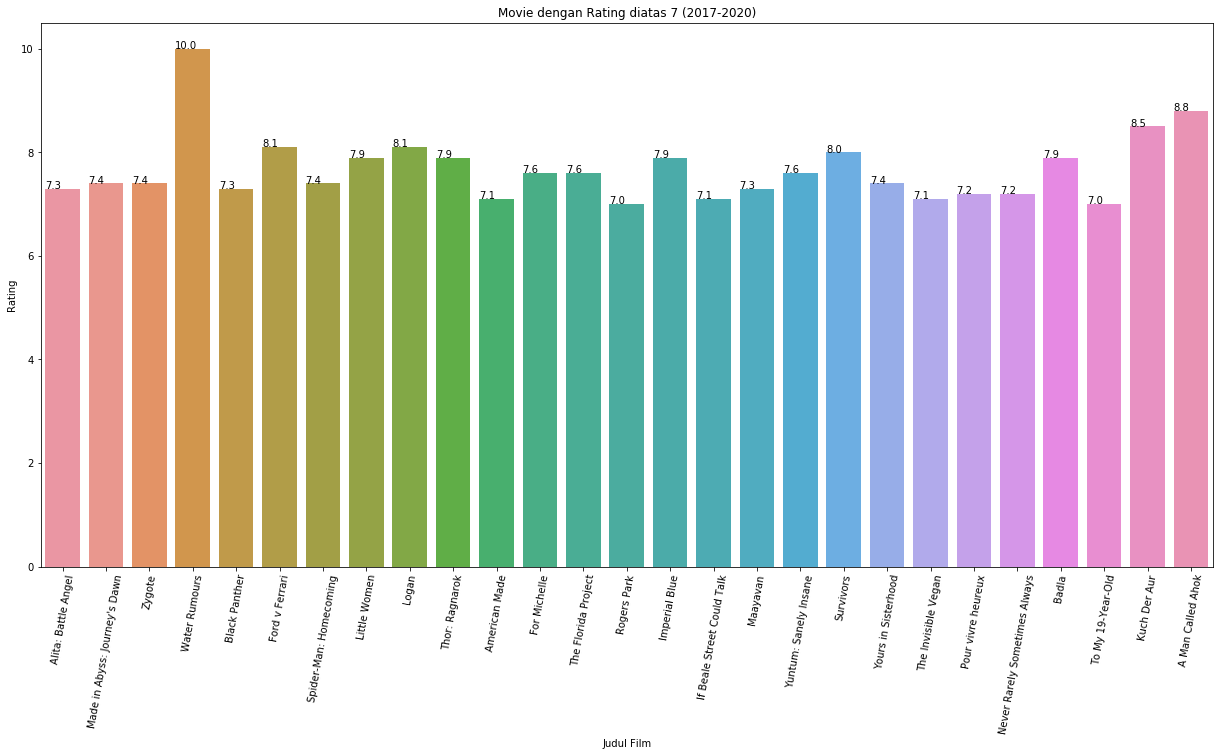

In [17]:
plt.figure(figsize=(21,10))
#Membuat plot 
bar = sns.barplot(eda_df1['title'], eda_df1['rating'])
#kustomisasi Label
plt.title("Movie dengan Rating diatas 7 (2017-2020)")
plt.ylabel("Rating")
plt.xlabel("Judul Film")
plt.xticks(rotation=80)
for p in bar.patches:
    bar.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

### 2). Membuat Pie Chart Untuk PersentaseTipe Film pada Dataset

Dengan Memvissualisasikan Jumlah Film Berdasarkan tipenya, kita dapat melihat dalam bentuk persentasenya. Mana tipe film yang paling bnyak, seperti judul dengan tipe movie terdapat berapa persen dari jumlah total data dan berapa persentae untuk tipe Tv Series, Tv Movie, Tv MiniSeries, Video, Short. Data yang akan diambil  untuk tahun 2017 hingga 2020

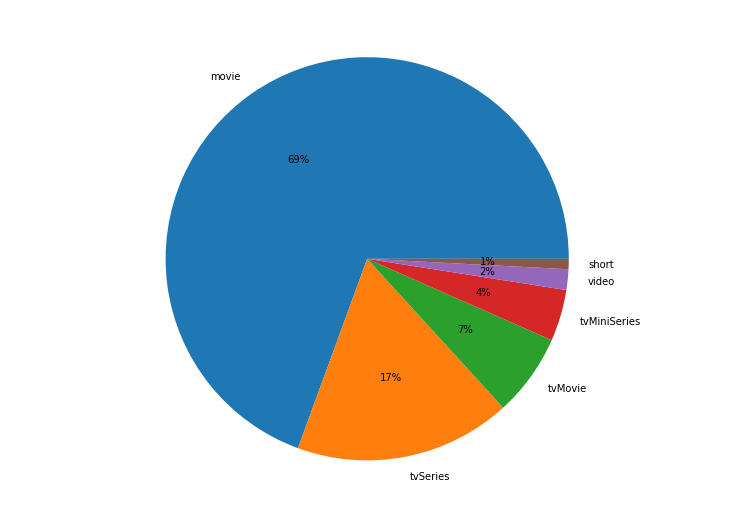

In [18]:
#Mengambil value 'movie', 'tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'short' pada kolom type untuk tahun 2017-2020
eda_df2 = eda_df.loc[(base_drop2["year"] >= 2017)]
eda_df2 = eda_df2.loc[(eda_df2["type"].isin(['movie', 'tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'short']))]
#Membuat figur plot
fig = plt.figure(figsize=(10,7))
#Membuat sumbu plot
ax = fig.add_axes([0,0,1,1])
#Mengubah batas sumbu x atau y sehingga memiliki panjang yang sama
ax.axis('equal')
#Membuat Label pie chart
labels = ['movie', 'tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'short']
#Menghitung banyaknya unik dari kolom type dengan value_counts()
rat = eda_df2.type.value_counts()
#Membuat bentuk pie chart
ax.pie(rat, labels = labels, autopct='%.0f%%')
plt.show()

### 3). Membuat Subplot Untuk Jumlah film berdasarkan tipenya untuk Masing - Masing Tahun 2017 - 2020

Dengan subplot, kita dapat melihat jumlah data tipe film untuk masing masing tahunnya. Pertahunnya dapat terlihat banyaknya film berdarakan tipenya yang telah dibuat. Untuk data diambil masih sama yaitu untuk tahun 2017 hingga 2020

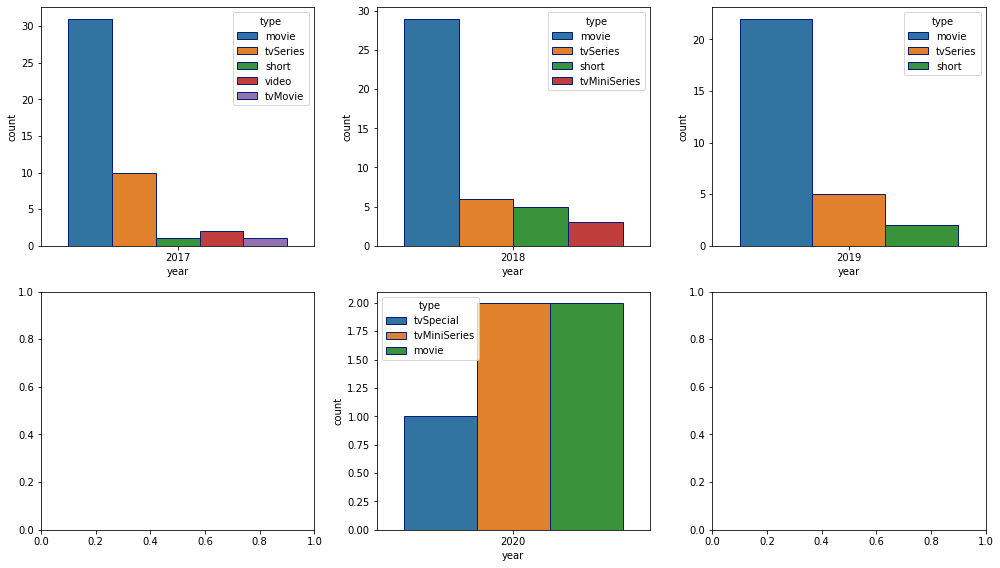

In [19]:
#Mengubah kolom year menjadi integer
base_drop2["year"] = base_drop2["year"].astype('int64')
#Mengambil data Berdarakan tahunnya
df_2017 = base_drop2.loc[(base_drop2["year"] == 2017)]
df_2018 = base_drop2.loc[(base_drop2["year"] == 2018)]
df_2019 = base_drop2.loc[(base_drop2["year"] == 2019)]
df_2020 = base_drop2.loc[(base_drop2["year"] == 2020)]
#Membuat subplot
fig, ax = plt.subplots(2, 3, figsize=(14, 8))
#membuat plot dengan jumlah pengamatan di setiap bin kategorik variable dengan countplot()
sns.countplot(data=df_2017, x='year', hue='type', ax=ax[0][0],
              edgecolor=sns.color_palette("dark", 3))
sns.countplot(data=df_2018, x='year', hue='type', ax=ax[0][1],
             edgecolor=sns.color_palette("dark", 3))
sns.countplot(data=df_2019, x='year', hue='type', ax=ax[0][2],
             edgecolor=sns.color_palette("dark", 3))
sns.countplot(data=df_2020, x='year', hue='type', ax=ax[1][1],
             edgecolor=sns.color_palette("dark", 3))
plt.tight_layout()
plt.show()

## C. Creating Content-based Recommender System

**1). Klasifikasi Metadata**


Tahapan awal yaitu menglasifikasi data/mengambil data sesuai kebutuhan. Disini kolom yang diklasifikasi yaitu title, cast_name, genres, director_name, dan writer_name.

In [20]:
#Klasifikasi berdasar title, cast_name, genres, director_name, dan writer_name
feature_df = base_drop2[['title','cast_name','genres','director_name','writer_name']]

#Tampilkan 5 baris teratas
print(feature_df.head())

                    title           cast_name                       genres  \
0         The Love Expert  [Natalie Talmadge]            [Comedy, Romance]   
1               Yes or No  [Natalie Talmadge]                    [Unknown]   
2         Our Hospitality  [Natalie Talmadge]  [Comedy, Romance, Thriller]   
3       The King of Kings     [Reeka Roberts]  [Biography, Drama, History]   
4  I Cover the Waterfront     [James Hackett]             [Drama, Romance]   

                       director_name  \
0                   [David Kirkland]   
1                [Roy William Neill]   
2  [Buster Keaton, John G. Blystone]   
3                 [Cecil B. DeMille]   
4                      [James Cruze]   

                                         writer_name  
0                         [John Emerson, Anita Loos]  
1   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]  
2  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...  
3                                [Jeanie Macpherson]  
4              

**2). Membuat Fungsi Untuk Strip Spaces dari Setiap Row dan Setiap Elemennya**

Tahap ini menghapus jika ada spasi Disetiap elememn ataupun baris pada data. Hal ini guna mengurangi eror pada model yang dibuat.

In [21]:
def sanitize(x):
    try:
        #kalau cell berisi list
        if isinstance(x,list):
            return [i.replace(' ','').lower() for i in x]
        #kalau cell berisi string
        else:
            return [x.replace(' ','').lower()]
    except:
        print(x)
        
#Kolom : cast_name, genres, writer_name, director_name        
feature_cols = ['cast_name','genres','writer_name','director_name']

#Apply function sanitize 
for col in feature_cols:
    feature_df[col] = feature_df[col].apply(sanitize)

C:\Users\Microsoft\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**3). Membuat Fungsi untuk Membuat Metadata Soup (menggabungkan semua feature menjadi 1 bagian kalimat) untuk setiap Judulnya**

Jadi akan membuat metadata Soup dimana valuenya berasal dari value kolom cast_name, genres, director_name, writer_name yang akan dijadikan satu kalimat. Lalu soop tersebut akan dibuat menjadi satu kolom. 

In [22]:
#kolom yang digunakan : cast_name, genres, director_name, writer_name
def soup_feature(x):
    return ' '.join(x['cast_name']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['director_name']) + ' ' + ' '.join(x['writer_name'])

#membuat soup menjadi 1 kolom 
feature_df['soup'] = feature_df.apply(soup_feature, axis=1)
    

C:\Users\Microsoft\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**4). Menyiapkan CountVectorizer (stop_words = english) dan Fit Dengan Soup Yang Telah Buat di Atas**

CountVectorizer Scikit-learn digunakan untuk mengonversi kumpulan dokumen teks menjadi vektor. Ini juga memungkinkan pra-pemrosesan data teks sebelum menghasilkan representasi vektor. Dengan menggunakan stop_words='english', kata-kata seperti “and”, “the”, “him”, yang dianggap tidak informatif dalam merepresentasikan konten teks, dan dapat dihapus agar tidak ditafsirkan sebagai parameter untuk prediksi.

In [23]:
#import CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

#definisikan CountVectorizer dan mengubah soup tadi menjadi bentuk vector
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(feature_df['soup'])

print(count)
print(count_matrix.shape)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(1060, 10026)


**5). Membuat Model Similarity antara Count Matrix**

Kami akan menggunakan Cosine Similarity untuk menghitung kuantitas numerik yang menunjukkan kesamaan antara dua film.Dengan menghitung Count Matrix akan langsung memberi kita Skor Kesamaan Cosine. Dengan menggunakan cosine_similarity akan jauh lebih cepat.

In [24]:
#Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

#Gunakan cosine_similarity antara count_matrix 
cosine_sim = cosine_similarity(count_matrix, count_matrix)

#print hasilnya
print(cosine_sim)

[[1.         0.15430335 0.35355339 ... 0.         0.         0.13608276]
 [0.15430335 1.         0.10910895 ... 0.         0.         0.        ]
 [0.35355339 0.10910895 1.         ... 0.         0.08703883 0.09622504]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.08703883 ... 0.         1.         0.10050378]
 [0.13608276 0.         0.09622504 ... 0.         0.10050378 1.        ]]


**6) Membuat Content Based Recommender System**

Tahap Terakhit yaitu Pembuatan Content Based Recommender System. Dengan menghitung kesamaan antara film berdasarkan metrik tertentu dan menyarankan film yang paling mirip dengan film yang ditentukan. Untuk Parameter input dsni menggunakan title, dari judul nantinya akan di rekomendasikan judul film yang mirip berdasarkan cast_name, genres, director_name, writer_name dengan menghitung score dari model yang telah dibuat.

In [25]:
indices = pd.Series(feature_df.index, index=feature_df['title']).drop_duplicates()

def content_recommender(title):
    #mendapatkan index dari judul film (title) yang disebutkan
    idx = indices[title]

    #menjadikan list dari array similarity cosine sim 
    sim_scores = list(enumerate(cosine_sim[idx]))

    #mengurutkan film dari similarity tertinggi ke terendah
    sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse=True)

    #untuk mendapatkan list judul dari item kedua sampe ke 11
    sim_scores = sim_scores[1:11]

    #mendapatkan index dari judul-judul yang muncul di sim_scores
    movie_indices = [i[0] for i in sim_scores]

    #dengan menggunakan iloc, kita bisa panggil balik berdasarkan index dari movie_indices
    return base_df.iloc[movie_indices]

**7) Pengaplikasian Content Based Recommender System**

Sebagai Contoh Pengaplikasian, kami memasukkan judul 'Logan' 'Alita: Battle Angel' dan 'Iron Man'. Akan keluar hasil rekomendasi judul film yang mirip dengan judul film yang di input.

In [26]:
#Pengaplikasian function di atas dengan film yang sejenis Logan
print(content_recommender('Logan'))

    knownForTitles               cast_name     tconst titleType  \
751      tt1950186          [Chris Markle]  tt1950186     movie   
83       tt0079550  [Hallie Smith-Simmons]  tt0079550     movie   
189      tt0107597         [Dawn Mazzella]  tt0107597     movie   
454      tt0417552   [Tatyana Kuzmichyova]  tt0417552     movie   
934      tt5029630      [Leticia Armajach]  tt5029630     short   
110      tt0087303         [Joaquín Parra]  tt0087303     movie   
136      tt0093405    [William Holden Jr.]  tt0093405     movie   
335      tt0217869            [Sam Mercer]  tt0217869     movie   
382      tt0286106            [Sam Mercer]  tt0286106     movie   
466      tt0437086          [Jeff Bottoms]  tt0437086     movie   

            primaryTitle            originalTitle  isAdult  startYear  \
751       Ford v Ferrari           Ford v Ferrari        0     2019.0   
83                Meteor                   Meteor        0     1979.0   
189             Monolith                 Mo

In [27]:
print(content_recommender('Alita: Battle Angel'))

    knownForTitles                     cast_name     tconst titleType  \
637      tt1375666               [Dan Churchill]  tt1375666     movie   
649      tt1440129             [Robert E. Evans]  tt1440129     movie   
987      tt6450804       [Gustavo García Sierra]  tt6450804     movie   
233      tt0119116                [Mel Churcher]  tt0119116     movie   
511      tt0796366  [Matthew Fuchs, Aida Caefer]  tt0796366     movie   
753      tt1951265             [Robert E. Evans]  tt1951265     movie   
189      tt0107597               [Dawn Mazzella]  tt0107597     movie   
629      tt1337566                 [Kirk Larsen]  tt1337566     movie   
726      tt1825683             [Robert E. Evans]  tt1825683     movie   
424      tt0371746               [Matthew Fuchs]  tt0371746     movie   

                              primaryTitle  \
637                              Inception   
649                             Battleship   
987                  Terminator: Dark Fate   
233         

In [28]:
print(content_recommender('Iron Man'))

    knownForTitles                     cast_name     tconst titleType  \
726      tt1825683             [Robert E. Evans]  tt1825683     movie   
873      tt3385516              [Frank Maudsley]  tt3385516     movie   
511      tt0796366  [Matthew Fuchs, Aida Caefer]  tt0796366     movie   
611      tt1270798                 [Aida Caefer]  tt1270798     movie   
494      tt0478970            [Francesco Cadoni]  tt0478970     movie   
791      tt2250912              [Frank Maudsley]  tt2250912     movie   
466      tt0437086                [Jeff Bottoms]  tt0437086     movie   
637      tt1375666               [Dan Churchill]  tt1375666     movie   
649      tt1440129             [Robert E. Evans]  tt1440129     movie   
877      tt3501632            [Francesco Cadoni]  tt3501632     movie   

               primaryTitle           originalTitle  isAdult  startYear  \
726           Black Panther           Black Panther        0     2018.0   
873       X-Men: Apocalypse       X-Men: Apoca